In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X, y) = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=2.5, random_state=95)

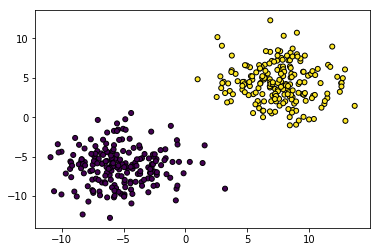

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [4]:
X = np.hstack((np.ones((400,1)), X))

$S(t) = \frac{1}{1+e^-t}$

In [5]:
def sigmoid(t):
  return 1 / (1 + np.exp(-t))

In [6]:
# Initialize weight matrix
W = np.random.uniform(size=(X.shape[1],))

print (W)

[0.90105574 0.92833342 0.00364176]


In [7]:
# Initialize a learning rate
n = np.random.random()

In [8]:
# Calc output of row t
def output(t):
    
    r = X[t][0] * W[0] + X[t][1] * W[1] + X[t][2] * W[2]
    true_output = sigmoid(r) # activation function on output
    return true_output

# output of row 1
true_output_1 = output(0)

In [9]:
# Calc the error of row t

def error(t):
    error = y[t] - output(t)
    return error

In [10]:
# Update the row t of weight matrix

def updateWeightMatrix(t):

    W[0] = W[0] + (n * error(t) * X[t][0])
    W[1] = W[1] + (n * error(t) * X[t][1])
    W[2] = W[2] + (n * error(t) * X[t][2])
    
updateWeightMatrix(0)

print(W)

[0.86946775 1.06645046 0.04928375]


In [13]:
# initialize a list to store the average loss for each epoch
lossHistory = []
# repeat several passes over the entire training dataset
for epoch in np.arange(0, 1000):
    # initialize the total loss for the epoch
    epochLoss = []
    # parse the entire training dataset, calculate loss in each row, append it to epochloss
    for t in range(400):
        updateWeightMatrix(t)
        loss = error(t) ** 2
        epochLoss.append(loss)
    
    lossHistory.append(np.average(epochLoss))
    

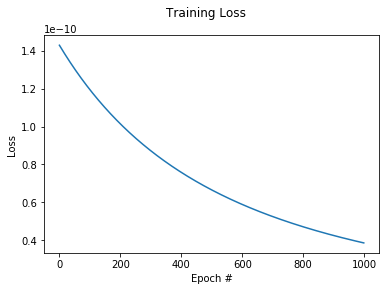

In [15]:
fig = plt.figure()
plt.plot(np.arange(0, 1000), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

In [16]:
# Calculate the line of best fit using the final weight matrix
Y = (-W[0] - (W[1] * X)) / W[2]

<function matplotlib.pyplot.show>

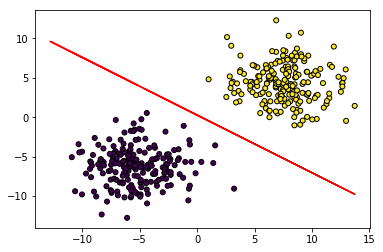

In [17]:
# Plot the original data along with the line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker='o', c=y, s=25, edgecolor='k')
plt.plot(X, Y, "r-")
plt.show